<a href="https://www.kaggle.com/code/mohammedmohsen0404/heart-failure-prediction?scriptVersionId=188632679" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Heart Failure Detection</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This project aims to develop a machine learning model to predict the likelihood of heart disease using a comprehensive dataset of 1190 observations compiled from five different heart datasets. The dataset includes 11 features such as age, sex, chest pain type, resting blood pressure, cholesterol levels, and others. Early detection and management of heart disease can significantly improve patient outcomes, and this predictive model will aid in identifying individuals at high cardiovascular risk.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download fedesoriano/heart-failure-prediction -f  heart.csv

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0%|                                               | 0.00/35.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 35.1k/35.1k [00:00<00:00, 1.63MB/s]


In [4]:
D = pd.read_csv('heart.csv')
data = D.copy()

# **Take a look at the data**
---

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.select_dtypes(include=['object']).describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [9]:
data['HeartDisease'] = data['HeartDisease'].convert_dtypes(bool)

In [10]:

data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: Int64

# **Exploratory Data Analysis**
---

**Univariate Analysis**

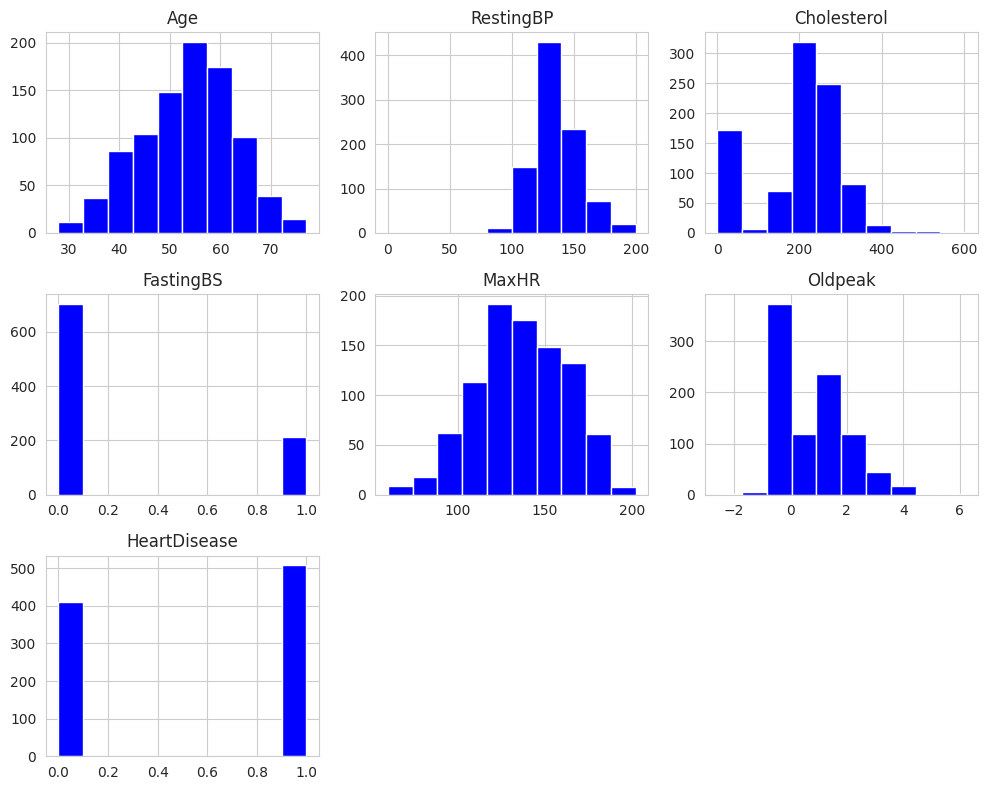

In [11]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

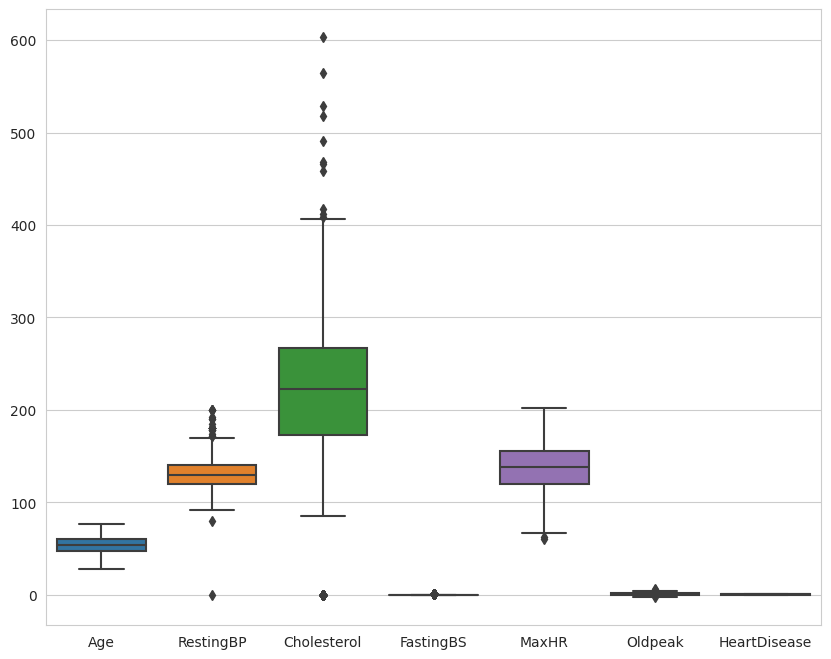

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

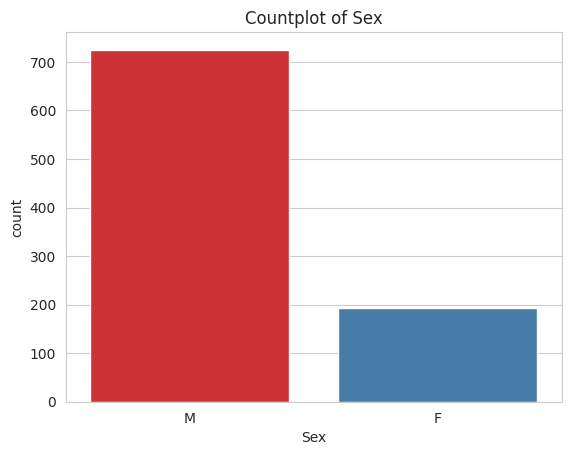

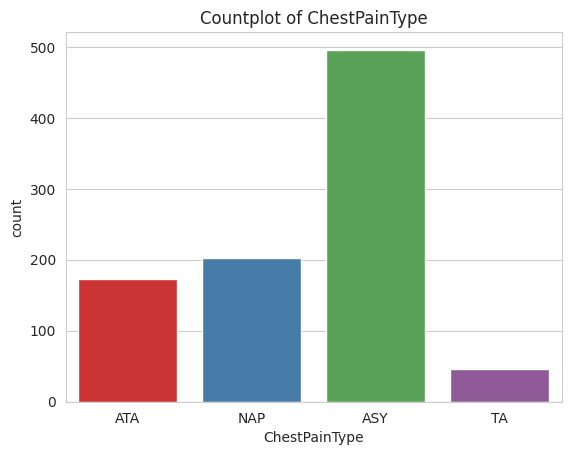

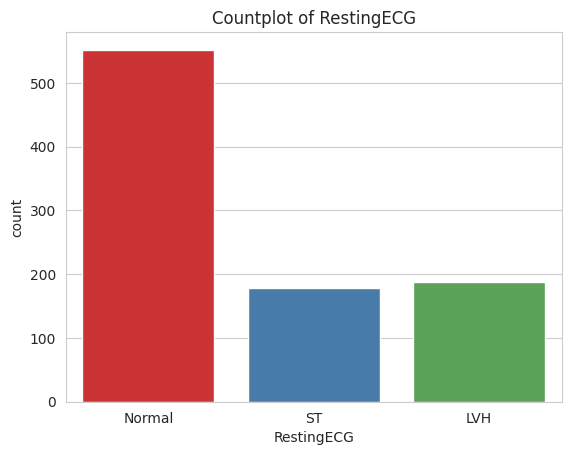

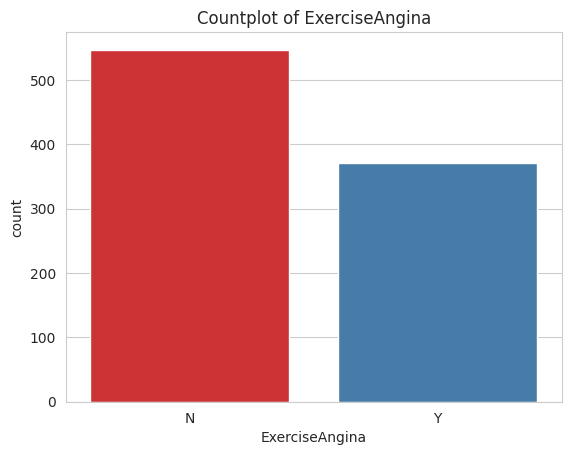

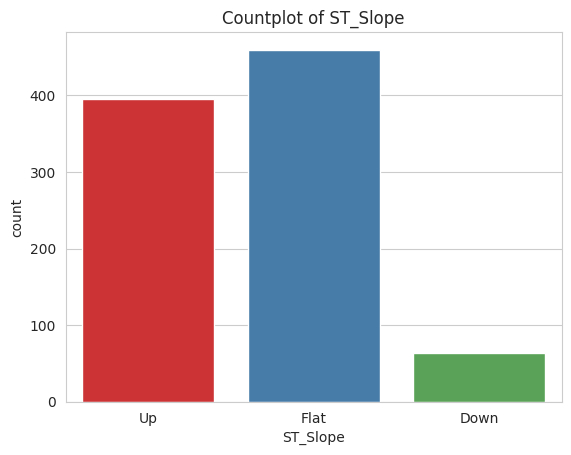

In [13]:
categorical_data = data.select_dtypes(include='object')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

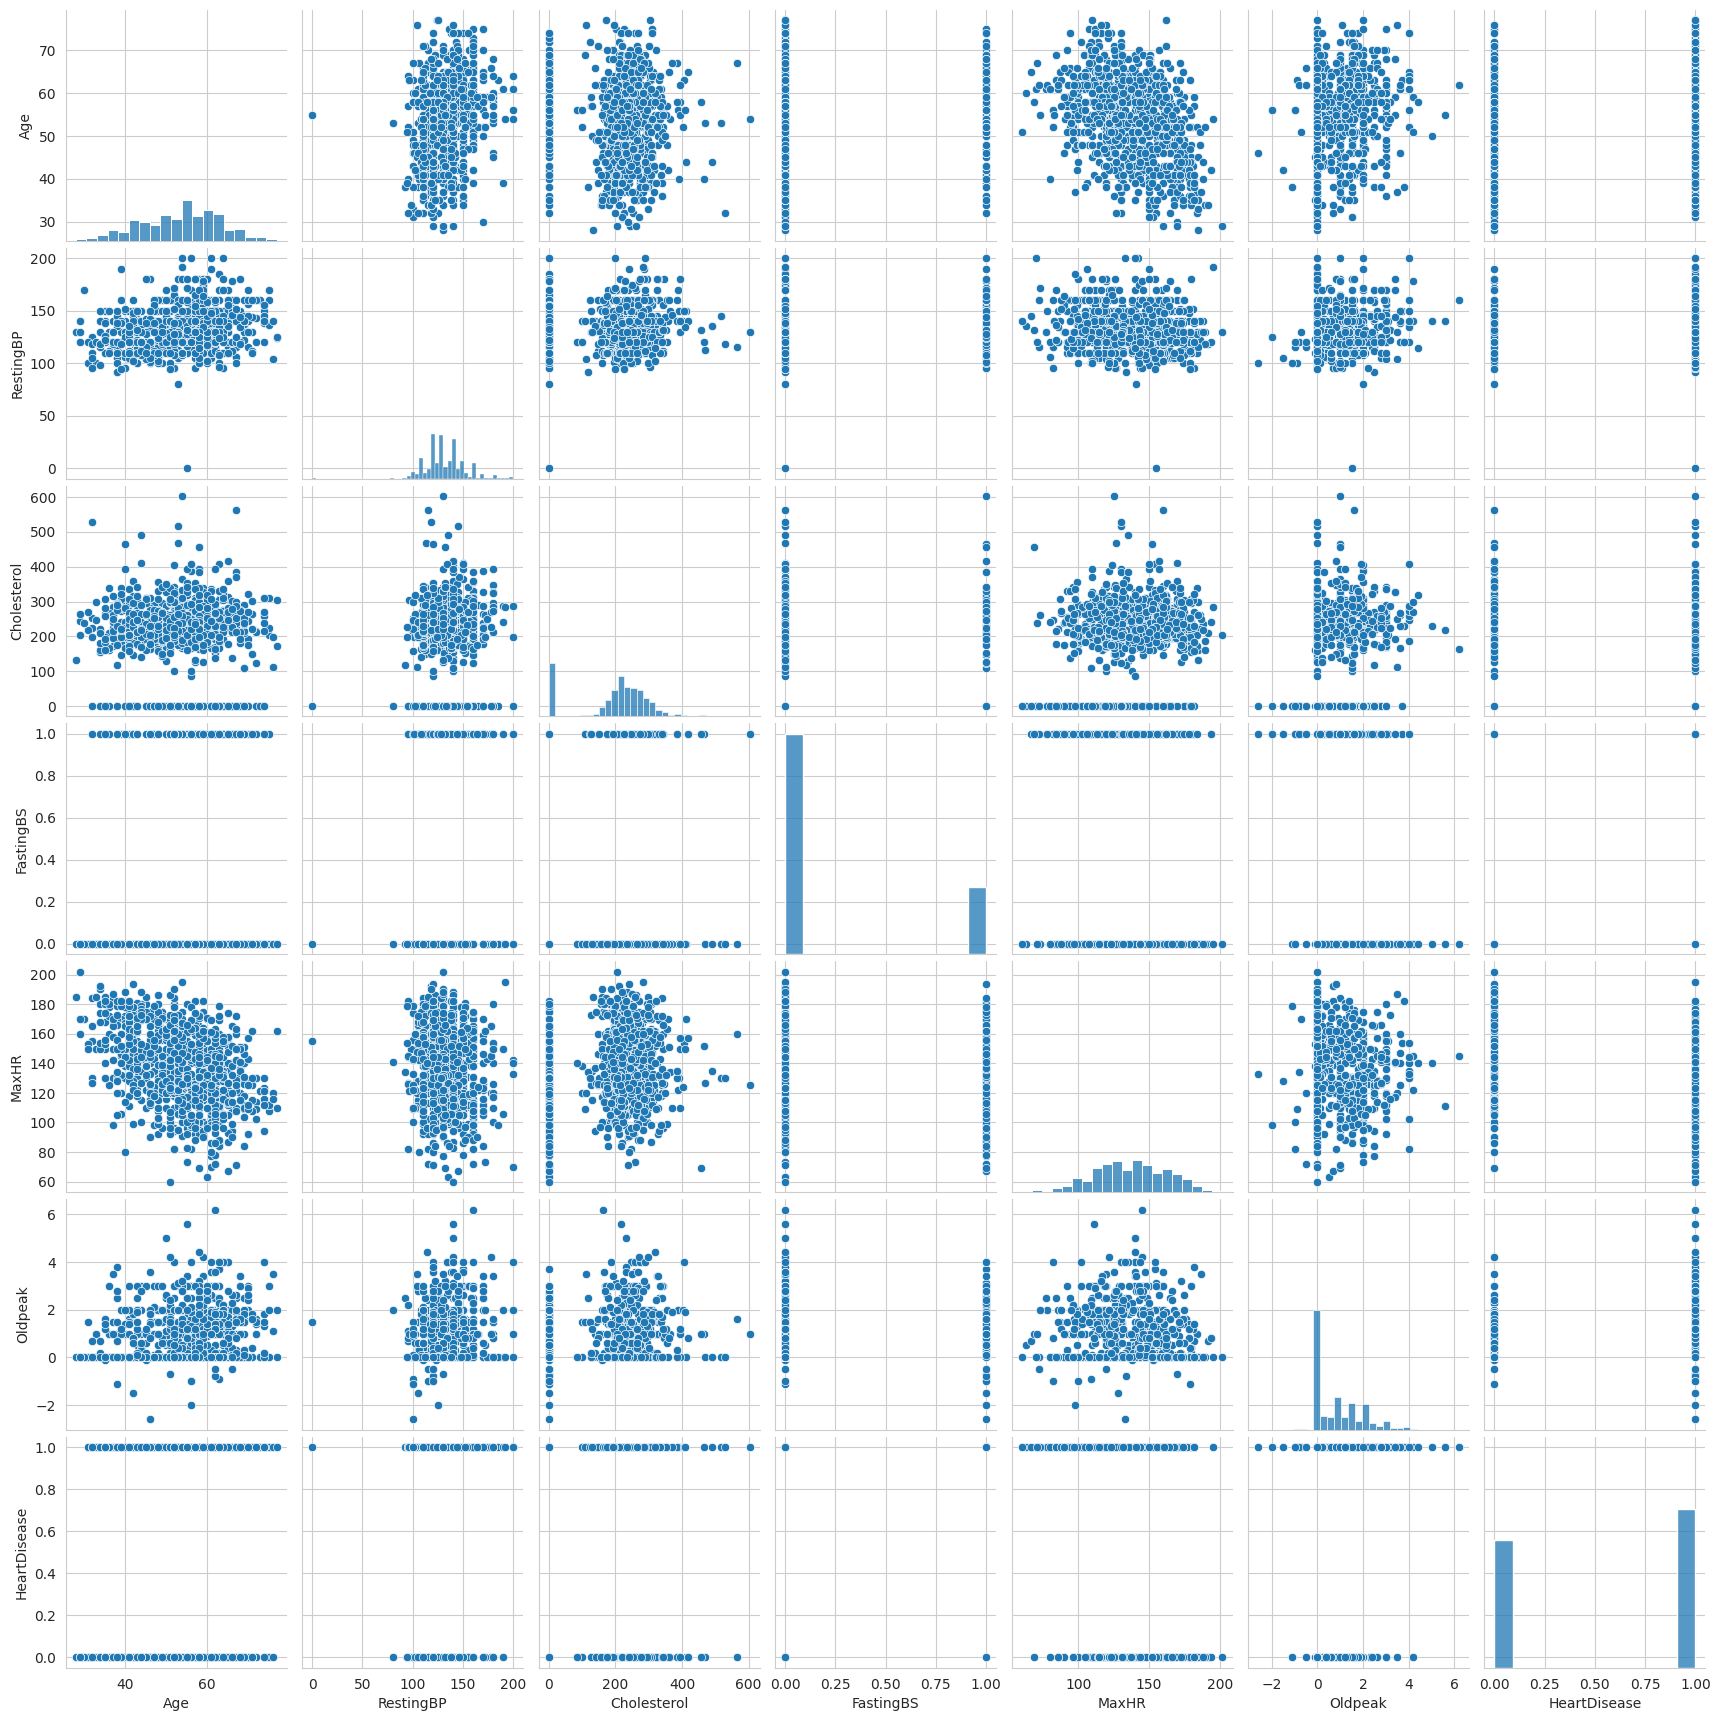

In [14]:
sns.pairplot(data.select_dtypes(include='number'))
plt.show()

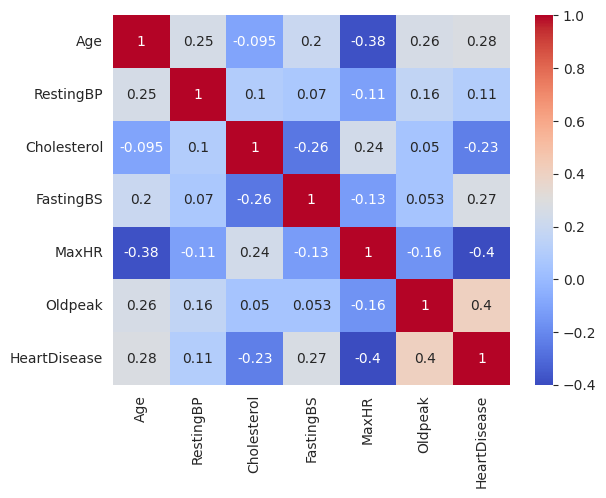

In [15]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [16]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [17]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


In [18]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Encoding Categorical Variables**

In [19]:
data['Sex']=data['Sex'].apply(lambda x: 1 if x =='M' else 0)
data['ExerciseAngina']=data['ExerciseAngina'].apply(lambda x: 1 if x =='Y' else 0)

In [20]:
data=data.join(pd.get_dummies(data['ChestPainType']))
data=data.join(pd.get_dummies(data['RestingECG']))
data=data.join(pd.get_dummies(data['ST_Slope']))

In [21]:
data=data.drop('ChestPainType', axis=1)
data=data.drop('RestingECG', axis=1)
data=data.drop('ST_Slope', axis=1)

**Data splitting**

In [22]:
X = data.drop('HeartDisease', axis = 1)
y = data.HeartDisease

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101,stratify=y)

**Data Normalization**

In [24]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# **Traditional models**
---

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report , f1_score

In [26]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

In [27]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    print('---------------------------------------------------')

Logistic Regression: F1 Score = 0.87
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       123
         1.0       0.88      0.89      0.88       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

---------------------------------------------------
Random Forest: F1 Score = 0.88
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       123
         1.0       0.88      0.92      0.90       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

---------------------------------------------------
Gradient Boosting: F1 Score = 0.90
Gradient Boosting Classification Report:
              prec

# **DNN**
---

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score

2024-07-17 05:01:28.674546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 05:01:28.674768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 05:01:28.834538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [29]:
model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),Dropout(0.4),
    Dense(24, activation='relu'), Dropout(0.4),
    Dense(24, activation='relu'),Dropout(0.4),
    Dense(4, activation='softmax')
])


In [30]:
lr = 0.001
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr),
    metrics=['accuracy']
)

In [31]:
#model.summary()

In [32]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [33]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1634 - loss: 1.6286
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4089 - loss: 1.3052 
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5064 - loss: 1.1717 
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 1.0263 
Epoch 5/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6140 - loss: 0.8806 
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6000 - loss: 0.8283 
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 0.7760 
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - loss: 0.6786 
Epoch 9/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7345 - loss: 0.6385 
Epoch 10/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7119 - loss: 0.6224 
Epoch 11/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7654 - loss: 0.5565 
Epoch 12/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

In [34]:
test_preds = model.predict(X_test)
test_preds = np.argmax(test_preds, axis=1)  # Get the index of the class with highest probability
test_acc = accuracy_score(y_test, test_preds)
test_rec = recall_score(y_test, test_preds)
test_pre = precision_score(y_test, test_preds)
test_F1 = f1_score(y_test, test_preds)

print('Test Set Metrics')
print('Ensemble Model Accuracy:', test_acc)
print('Ensemble Model Recall:', test_rec)
print('Ensemble Model Precision:', test_pre)
print('Ensemble Model f1-score:', test_F1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Test Set Metrics
Ensemble Model Accuracy: 0.8623188405797102
Ensemble Model Recall: 0.8627450980392157
Ensemble Model Precision: 0.8859060402684564
Ensemble Model f1-score: 0.8741721854304637
